Were going to read in the data, 

1. Visualize the data to gain insights into data
2. Prepare the data for ML algorithms
3. Select a models and train it 
4. Evaluate its performance
5. Fine tune the model
6. Future steps 

Before reading in the model, we need to find think about the big picture: Business objective of this excercise. In this case, the farming compnay has the following data and are asking what relevant information can they get using statistical analysis of the data. For example, the company may want to know  amongst the predictors of the yield: water, sunlight, soil treatment such as fertilizer and pesticides, which have a greater impact and by how much. How does regional location of the farms effect the amount of sunlight they get or is the farm region even a factor.

the assessment lists patterns and predictions as the goals, therefore patterns could be the covariance of different predictor or amongs themselves such as: does a particular region seem to be more fertile than the rest or will result in higher yield per area. Does certain fertilizer_usage level work better than the rest, if so under what condition, and etc. I will not speculate as of now before seeing what the data tells us.

Prediciton however, seems to be more straight foreward. We have some familiarity with the data based on the description of the data. My naive guess is that this the we can create a model in order to predict the yield of the farm based on various input variables, such as: water, sunlight, fertilizer, area etc.

\begin{equation*}
    yield = f(water, uv, fertilizer, area, pesticides, region)
\end{equation*}

but since the input variables seem to be carrying per unit area (hectare), the target variable could be yield per hectare to make them standard:

\begin{equation*}
    yield/area = f(water/area, uv/area, pesticides/area)
\end{equation*}

therefore our target variable becomes "yieldpa" which stands for yield per Unit Area.

In [1]:
import pandas as pd

data = pd.read_csv("dataset.csv", header=0)

In [2]:
data.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   water             958 non-null    float64
 2   uv                949 non-null    float64
 3   area              1000 non-null   float64
 4   fertilizer_usage  1000 non-null   int64  
 5   yield             1000 non-null   float64
 6   pesticides        1000 non-null   float64
 7   region            1000 non-null   int64  
 8   categories        1000 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB


few things to notice here:

1. both water and uv columns seem to be missing values - this need to be recounciled later, by either dropping na's or filling them with averages, etc.
2. All attributes are numerical, except the categories field. Its type is object, so it could hold any kind of Python object. But since we loaded this data from a CSV file, we know that it must be a text attribute. probably a categorical attribute.

In [4]:
data["categories"].value_counts()

c          110
b           81
d           80
a           70
c,b         43
          ... 
a,b,c,d      2
d,a,b,c      2
a,c,d,b      1
a,b,d        1
d,c,a,b      1
Name: categories, Length: 62, dtype: int64

we know this column represents the pesticides used but it seems be listing them in order, (ie. a,b versus b,a) we need to determine if this ordering matters or if we need to sort them and count a,b versus b,a as the same.

In [5]:
data.describe()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,958.000000,949.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,12.223546,73.957488,8.098848,2.12300,58.758571,3.452301,3.039000
std,288.819436,172.335566,9.904063,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.000000,0.072000,45.264000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,249.750000,4.584750,66.502000,6.297000,1.00000,40.698000,1.804500,2.000000
50%,499.500000,6.476000,73.689000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,749.250000,8.758750,80.554000,9.900250,3.00000,73.645500,4.916000,5.000000
max,999.000000,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


closer examination of water column indicates a possible presence of an outlier - the max value seems to be way off

furthermore, we have determined that our target value will be yield per area, since this column currently doens't exist in our df, we need to create one.

In [6]:
#Convert Yield to Yield per unit Area
data["yieldpa"]= data["yield"]/data["area"]

also, we'll go ahead and sort out the categories column in order to be able to group pesticides used more effectively

In [7]:
cat = data["categories"]
data["cat"] = [','.join(sorted(set(i.split(',')))) for i in cat]

In [8]:
clean_data = data.drop(data['water'].idxmax())
c2 = clean_data.dropna()
#eliminate waters max value

Waters outlier entry is visible here and is throwing the distribution off - we're going to go ahead and eliminate it.

In [9]:
c2.describe()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,yieldpa
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,502.176923,6.669657,73.975835,8.084179,2.121978,58.672553,3.442197,3.070330,7.585813
std,287.068240,2.818954,9.878592,2.667679,1.522642,24.343881,2.064986,1.873766,2.725615
min,0.000000,0.072000,45.264000,0.263000,0.000000,2.843000,0.014000,0.000000,1.459255
25%,253.250000,4.634750,66.503500,6.289000,1.000000,40.830750,1.798250,2.000000,5.522134
50%,506.500000,6.508000,73.721000,7.982000,2.000000,55.602500,3.268000,2.000000,7.399693
75%,749.750000,8.746000,80.509500,9.808000,3.000000,73.708500,4.905250,5.000000,9.594710
max,999.000000,15.214000,106.310000,18.311000,5.000000,148.845000,9.532000,6.000000,14.232703


# 1. Visualize the data to gain insights into data

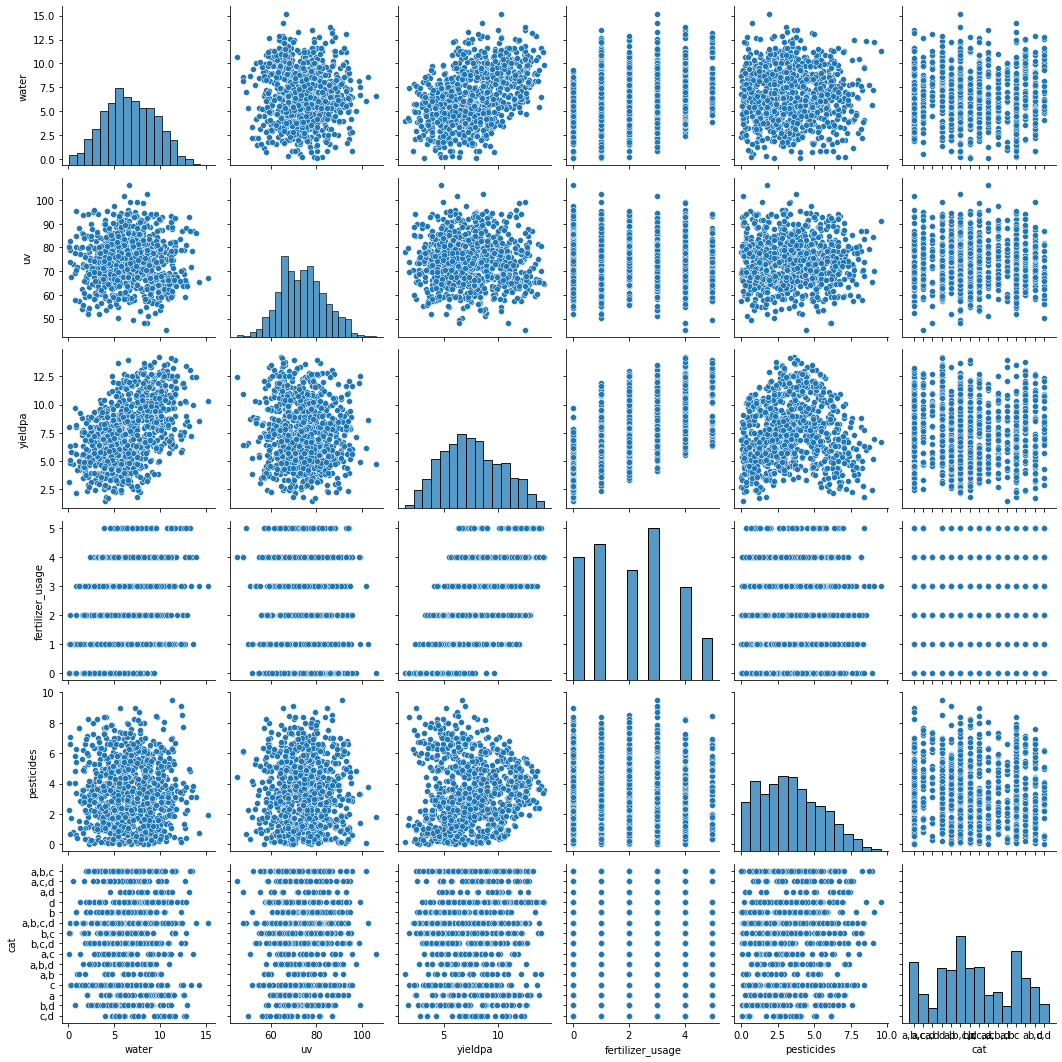

In [10]:
import seaborn as sns

sns.pairplot(
    c2, 
    
    x_vars=["water", "uv", "yieldpa", "fertilizer_usage", "pesticides", "cat"],
    y_vars=["water", "uv", "yieldpa", "fertilizer_usage", "pesticides", "cat"],
)

Couple of points:

1. Water and Yieldpa (Yield per Area) seem have strong correlation
2. We can further add in region and fertilizer usage to see if they differ across different values

We can examine the discrete variables using clour coding to Plot pairwise relationships in a dataset.



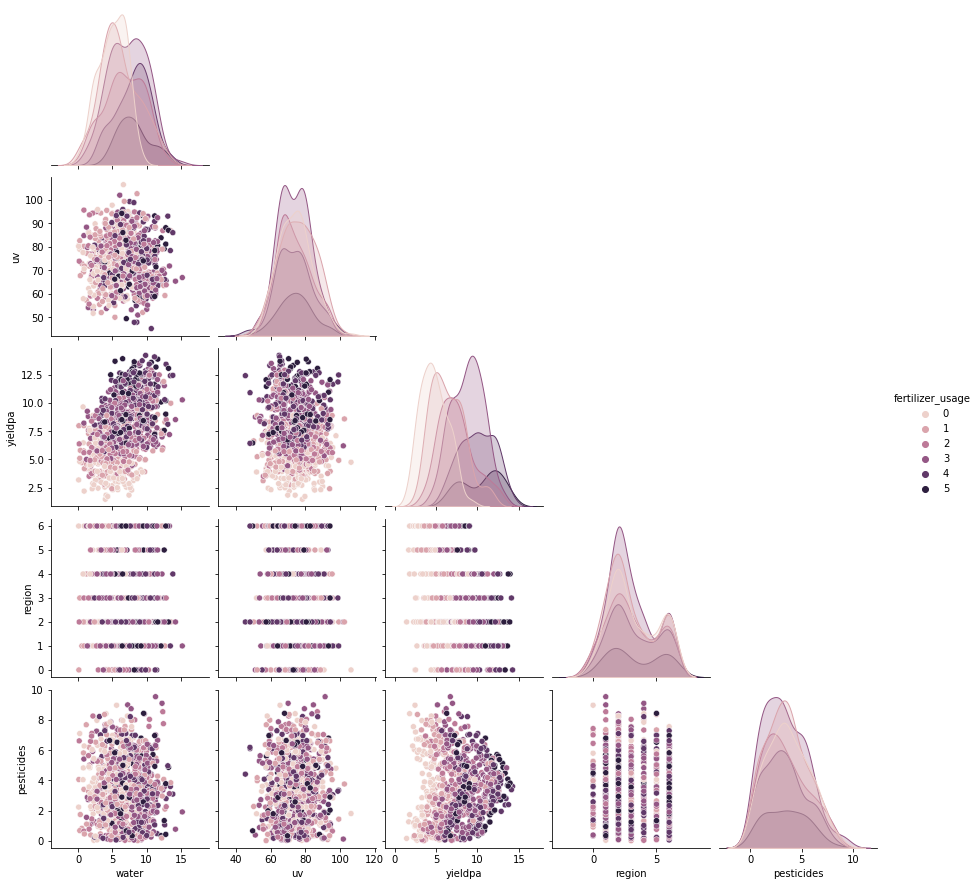

In [11]:
import seaborn as sns

sns.pairplot(
    c2, hue="fertilizer_usage", corner = True,
    x_vars=["water", "uv", "yieldpa", "region", "pesticides"],
    y_vars=["water", "uv", "yieldpa", "region", "pesticides"],
)

in the region vs yieldpa we observe evidance that higher fertilizer usage possibly correlates with higher yieldpa values

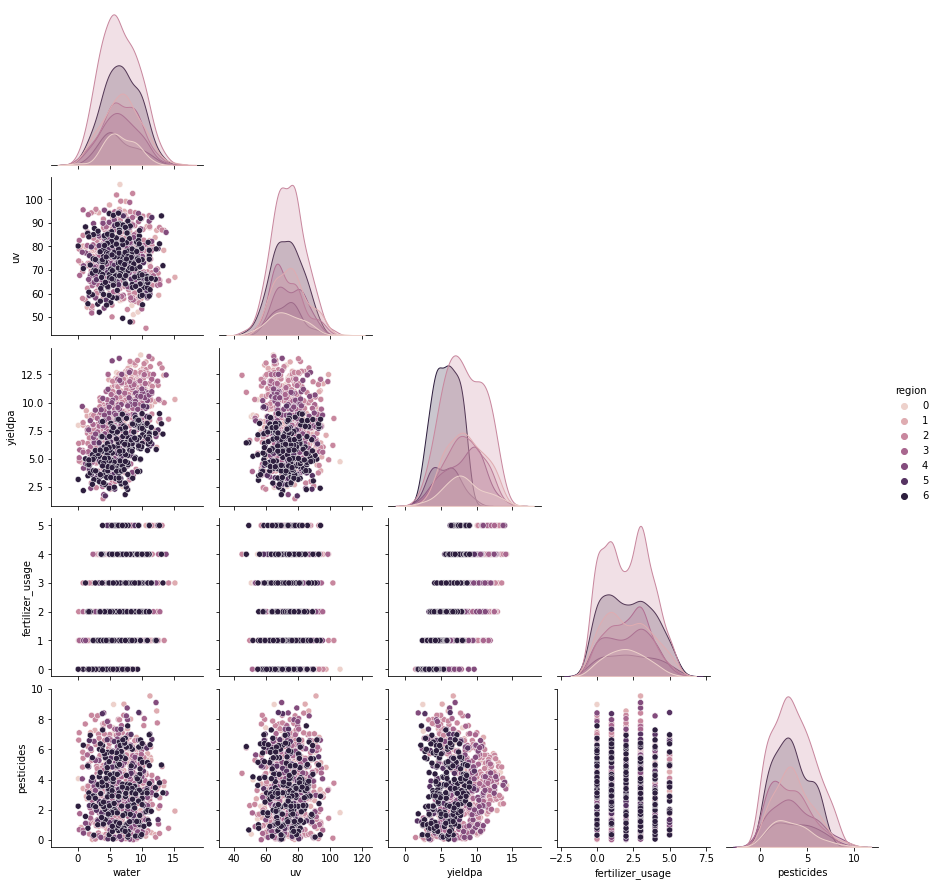

In [12]:
import seaborn as sns

sns.pairplot(
    c2, hue="region", corner = True,
    x_vars=["water", "uv", "yieldpa", "fertilizer_usage", "pesticides"],
    y_vars=["water", "uv", "yieldpa", "fertilizer_usage", "pesticides"],
)

Note on stratified sampling:

Here we purely random sampling methods. This is generally fine if our dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. Suppose we chatted with experts who told us that the irrigation system is a very important attribute to predict crop yields. Then we might want to ensure that the test set is representative of the various amount of water in the whole dataset. Since the median water is a continuous numerical attribute, we must first create an water category attribute and sample according to the distribution. This is left for future excercise.

We further examine the pairwise relantion of predictors to uncover any potential relationship between them.

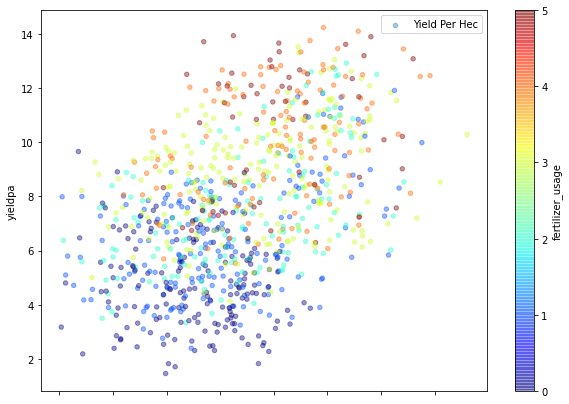

In [13]:
%matplotlib inline   
import matplotlib.pyplot as plt

c2.plot(kind="scatter", x="water", y="yieldpa", alpha=0.4,
    label="Yield Per Hec", figsize=(10,7),
    c="fertilizer_usage", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

not surprisingly as you would suspect, theres a posivive correlation between the amount of water and the yieldpa - what might be noteworthy here is that higher yieldpa seems to be correlated with higher fertilizer usage as well. 

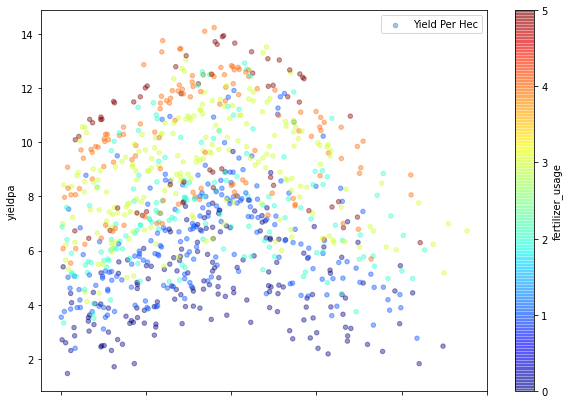

In [14]:
%matplotlib inline   
import matplotlib.pyplot as plt

c2.plot(kind="scatter", x="pesticides", y="yieldpa", alpha=0.4,
    label="Yield Per Hec", figsize=(10,7),
    c="fertilizer_usage", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

The figure above seems to be suggesting a diminishing marginal contribution of pesticides to yieldpa - bell-shape indicating increasing the pesticides to moderate level will benefit the yieldpa but possibly overdone and it becomes detrimental to the yieldpa.

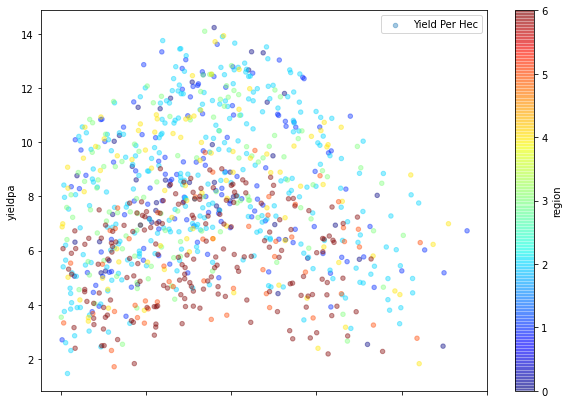

In [15]:
%matplotlib inline   
import matplotlib.pyplot as plt

c2.plot(kind="scatter", x="pesticides", y="yieldpa", alpha=0.4,
    label="Yield Per Hec", figsize=(10,7),
    c="region", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

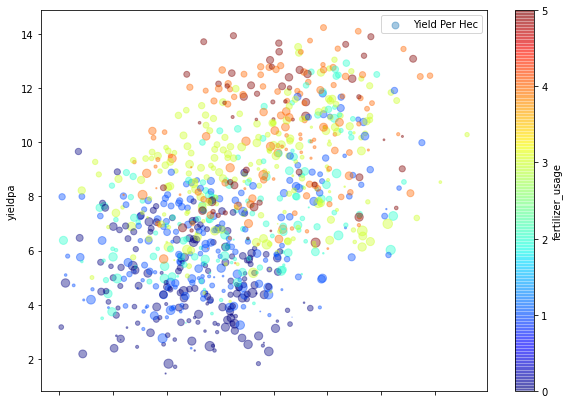

In [16]:
%matplotlib inline   
import matplotlib.pyplot as plt

c2.plot(kind="scatter", x="water", y="yieldpa", alpha=0.4,
    label="Yield Per Hec", figsize=(10,7), s=c2["pesticides"]*10,
    c="fertilizer_usage", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

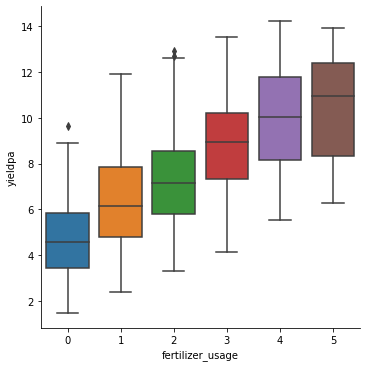

In [17]:
import seaborn as sns

sns.catplot(x="fertilizer_usage", y="yieldpa", data=c2, kind="box")

another strong evidence for relationship of higher fertilizer usage to higher yieldpa

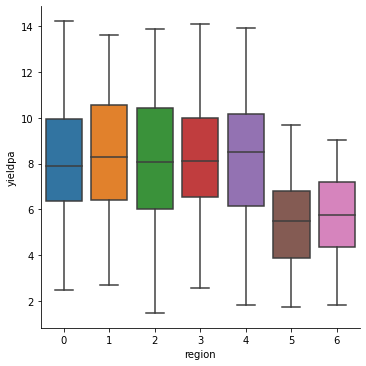

In [18]:
import seaborn as sns

sns.catplot(x="region", y="yieldpa", data=c2, kind="box")

the figure above ostensibly shows a higher yieldpa with the first 5 regions, but other factors might be at play.

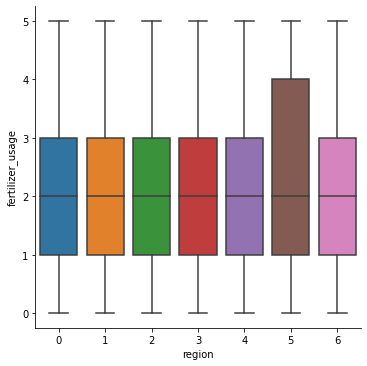

In [19]:
import seaborn as sns

sns.catplot(x="region", y="fertilizer_usage", data=c2, kind="box")

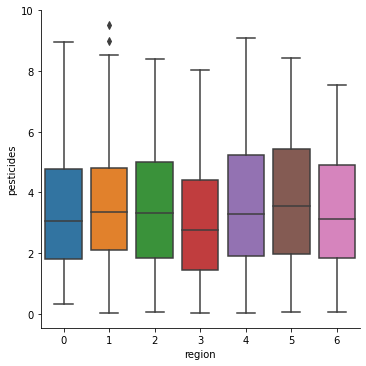

In [20]:
import seaborn as sns

sns.catplot(x="region", y="pesticides", data=c2, kind="box")

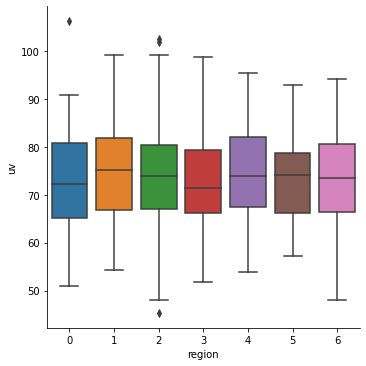

In [21]:
import seaborn as sns

sns.catplot(x="region", y="uv", data=c2, kind="box")

Looks like sunlight doesn't vary significantly amongst various regions

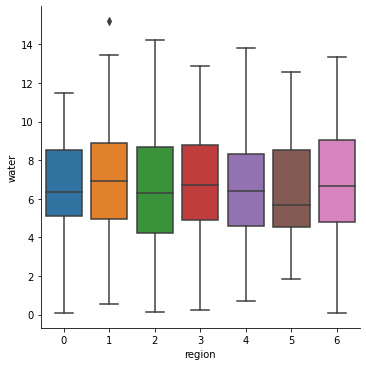

In [22]:
import seaborn as sns

sns.catplot(x="region", y="water", data=c2, kind="box")

Irrigation also seems to be stable across different regions 

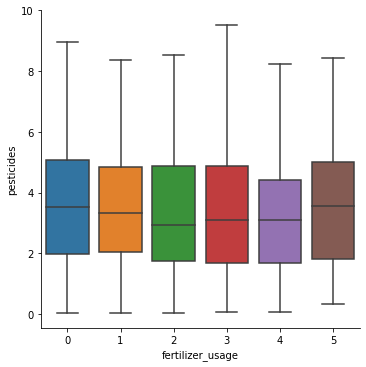

In [23]:
import seaborn as sns

sns.catplot(x="fertilizer_usage", y="pesticides", data=c2, kind="box")

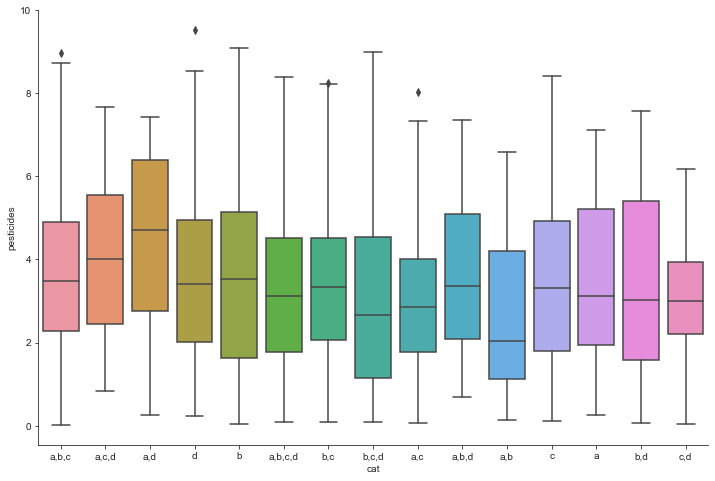

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(12, 8)
sns.boxplot(x="cat", y="pesticides", data=c2, ax=ax)    
sns.despine()

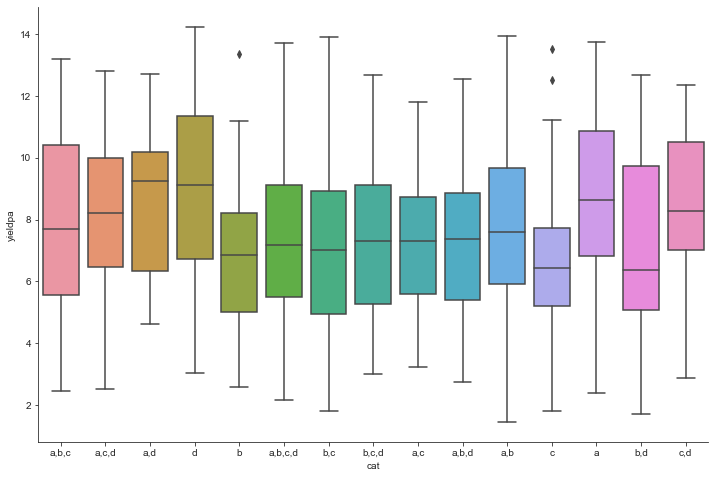

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(12, 8)
sns.boxplot(x="cat", y="yieldpa", data=c2, ax=ax)    
sns.despine()

Looking for Correlations:
Since this dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method:

In [26]:
corr_matrix = c2.corr()


In [27]:
corr_matrix["yieldpa"].sort_values(ascending=False)

yieldpa             1.000000
fertilizer_usage    0.677394
yield               0.589591
water               0.464587
pesticides          0.048274
id                  0.021546
uv                 -0.075048
region             -0.364019
area               -0.365206
Name: yieldpa, dtype: float64

array([[<AxesSubplot:xlabel='yieldpa', ylabel='yieldpa'>,
        <AxesSubplot:xlabel='water', ylabel='yieldpa'>,
        <AxesSubplot:xlabel='uv', ylabel='yieldpa'>,
        <AxesSubplot:xlabel='fertilizer_usage', ylabel='yieldpa'>,
        <AxesSubplot:xlabel='pesticides', ylabel='yieldpa'>],
       [<AxesSubplot:xlabel='yieldpa', ylabel='water'>,
        <AxesSubplot:xlabel='water', ylabel='water'>,
        <AxesSubplot:xlabel='uv', ylabel='water'>,
        <AxesSubplot:xlabel='fertilizer_usage', ylabel='water'>,
        <AxesSubplot:xlabel='pesticides', ylabel='water'>],
       [<AxesSubplot:xlabel='yieldpa', ylabel='uv'>,
        <AxesSubplot:xlabel='water', ylabel='uv'>,
        <AxesSubplot:xlabel='uv', ylabel='uv'>,
        <AxesSubplot:xlabel='fertilizer_usage', ylabel='uv'>,
        <AxesSubplot:xlabel='pesticides', ylabel='uv'>],
       [<AxesSubplot:xlabel='yieldpa', ylabel='fertilizer_usage'>,
        <AxesSubplot:xlabel='water', ylabel='fertilizer_usage'>,
        <AxesSu

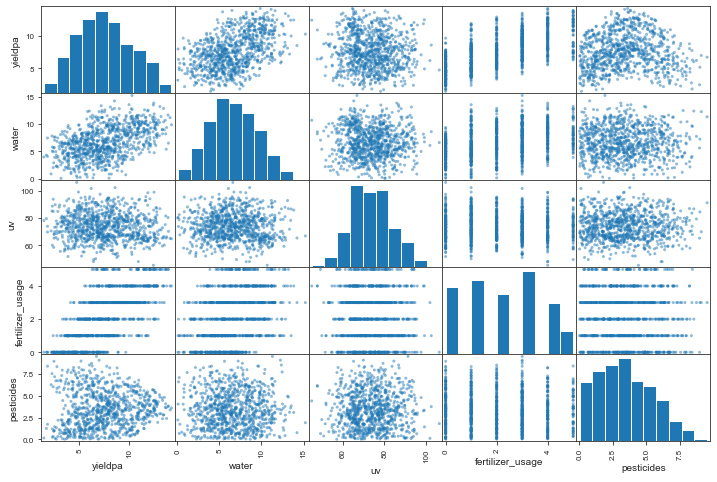

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["yieldpa", "water", "uv",
              "fertilizer_usage", "pesticides", "cat"]
scatter_matrix(c2[attributes], figsize=(12, 8))

The most promising attribute to predict the yieldpa value is fertilizer usage, so let’s zoom in on their correlation scatterplot 

# Experimenting with Atttribute Combinations

investigating pesticides vs. categories is hard since we don't know how much of each pesticides were used

In [29]:
c2.groupby(['cat'])['pesticides'].agg('sum')

cat
a          217.193
a,b         58.817
a,b,c      309.459
a,b,c,d    395.192
a,b,d      152.519
a,c        119.482
a,c,d      158.042
a,d         89.399
b          252.244
b,c        266.133
b,c,d      236.719
b,d        170.326
c          353.780
c,d         78.114
d          274.980
Name: pesticides, dtype: float64

In [30]:
c2.groupby(['cat'])['pesticides'].agg('mean')

cat
a          3.503113
a,b        2.557261
a,b,c      3.640694
a,b,c,d    3.293267
a,b,d      3.546953
a,c        3.144263
a,c,d      3.951050
a,d        4.469950
b          3.455397
b,c        3.501750
b,c,d      3.034859
b,d        3.406520
c          3.537800
c,d        3.004385
d          3.618158
Name: pesticides, dtype: float64

In [31]:
c2.groupby(['cat'])['yieldpa'].agg('mean')

cat
a          8.686111
a,b        7.819154
a,b,c      7.866026
a,b,c,d    7.400299
a,b,d      7.316332
a,c        7.336309
a,c,d      8.169215
a,d        8.561148
b          6.713669
b,c        7.173315
b,c,d      7.352910
b,d        7.243788
c          6.615081
c,d        8.351052
d          9.040358
Name: yieldpa, dtype: float64

were also going to invent new predictors and experiment with various attribution combo (at least some that make some sense)

In [68]:
#c2["water_per_pest"] = c2["water"]/c2["pesticides"]
#c2["uv_per_pest"] = c2["uv"]/c2["pesticides"]


In [35]:
corr_matrix = c2.corr()
corr_matrix["yieldpa"].sort_values(ascending=False)

yieldpa             1.000000
fertilizer_usage    0.677394
yield               0.589591
water               0.464587
pesticides          0.048274
id                  0.021546
uv                 -0.075048
water_per_pest     -0.077255
uv_per_pest        -0.145158
region             -0.364019
area               -0.365206
Name: yieldpa, dtype: float64

They don't appear to add significant value

In [36]:
predictors = c2.drop(["id", "yield", "categories", "area", "uv_per_pest", "water_per_pest"], axis=1)

In [37]:
predictors.head()

,water,uv,fertilizer_usage,pesticides,region,yieldpa,cat
0,5.615,65.281,0,8.969,0,2.469659,"a,b,c"
1,7.044,73.319,0,7.197,0,2.533752,"a,c,d"
2,5.607,60.038,2,7.424,0,8.037360,"a,d"
3,9.346,64.719,2,1.256,0,10.034322,d
5,5.920,78.735,2,1.136,0,5.625739,b


In [38]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(predictors, test_size=0.2, random_state=42)

# Prepare the data for Machine Learning algorithms


So we already took care of cleaning the data set (i.e. droping the na entries (alternatively, they could have been filled with averages of the set or etc.)

In [39]:
farming = train_set.drop("yieldpa", axis=1) # drop labels for training set
farming_labels = train_set["yieldpa"].copy()

Handling the catagorical attribute: there are a limited number of possible values, each of which represents a category (set of pesticides used). So this attribute is a categorical attribute. Most Machine Learning algorithms prefer to work with numbers, so we could convert these categories from text to numbers. However,

The issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases but it is obviously not the case for the pesticides used column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: "one-hot encoding"

In [90]:
pest_cat = predictors[["cat"]]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
farming_cat_1hot = cat_encoder.fit_transform(pest_cat)
farming_cat_1hot

<910x15 sparse matrix of type '<class 'numpy.float64'>'
	with 910 stored elements in Compressed Sparse Row format>

In [41]:
farming_num = farming.drop("cat", axis=1)

Feature Scaling - Had we decided on other systematic data techniques such as stratified sampling or filling the na's with averages this pipeline is where we add those features

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    
        ('std_scaler', StandardScaler()),
    ])

farming_num_tr = num_pipeline.fit_transform(farming_num)

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. 

In [44]:
from sklearn.compose import ColumnTransformer

num_attribs = list(farming_num)
cat_attribs = ["cat"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

farming_prepared = full_pipeline.fit_transform(farming)

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(farming_prepared, farming_labels)

LinearRegression()

Let’s try it out on a few instances from the training set:

In [50]:
some_data = farming.iloc[:5]
some_labels = farming_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [6.10679127 6.91683028 5.41380965 9.81263184 9.25714807]
Labels: [6.076277749096541, 5.0555178498710465, 6.43493714781101, 8.056430707876371, 7.7681243926141885]


It works, although the predictions are not exactly accurate (e.g., the second prediction is off by close to 35%!). Let’s measure this regression model’s RMSE 

In [69]:
from sklearn.metrics import mean_squared_error
import numpy as np
farming_predictions = lin_reg.predict(farming_prepared)
lin_mse = mean_squared_error(farming_labels, farming_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.5338502178989037

This is better than nothing, but clearly not a great score: most farm’s yieldpa range between 5.5 and 9.6, so a typical prediction error of 1.534 is not very satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. One way to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, which rules out the last option. We can try to add more features (e.g., the log of the area, etc.), but first let’s try a more complex model to see how it does.

In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(farming_prepared, farming_labels)

DecisionTreeRegressor()

In [89]:
farming_predictions = tree_reg.predict(farming_prepared)
tree_mse = mean_squared_error(farming_labels, farming_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

overfitting!

# Fine tuning model

One way to evaluate the Decision Tree model would be to use K-fold cross-validation feature. The code randomly splits the training set into k distinct subsets called folds, then it trains and evaluates the Decision Tree model k times, picking a different fold for evaluation every time and training on the other k-1 folds. The result is an array containing the k evaluation scores

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, farming_prepared, farming_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [76]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())



In [77]:
display_scores(tree_rmse_scores)

Scores: [1.44212385 1.12560218 1.09745061 1.29802227 1.12829642 1.29314829
 1.19336629 1.24870968 1.39253071 1.12028514]
Mean: 1.2339535441257654
Standard deviation: 0.115070624258526


In [78]:
lin_scores = cross_val_score(lin_reg, farming_prepared, farming_labels,
...                              scoring="neg_mean_squared_error", cv=10)
...
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.58514551 1.51380686 1.67175165 1.73985415 1.59003576 1.59116908
 1.48177235 1.59480919 1.54006632 1.38873352]
Mean: 1.5697144385041686
Standard deviation: 0.09251638143911779


In [82]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(farming_prepared, farming_labels)


farming_predictions = forest_reg.predict(farming_prepared)
forest_mse = mean_squared_error(farming_labels, farming_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


0.34125402944682415

In [83]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, farming_prepared, farming_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.92455957 0.82805871 0.83905692 0.99918807 0.95456965 1.09413982
 0.89661343 0.84325663 0.93599641 0.89111435]
Mean: 0.9206553559809789
Standard deviation: 0.07767799453412827


In [84]:
scores = cross_val_score(lin_reg, farming_prepared, farming_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      1.569714
std       0.097521
min       1.388734
25%       1.520372
50%       1.587591
75%       1.593899
max       1.739854
dtype: float64

In [88]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="rbf")
svm_reg.fit(farming_prepared, farming_labels)
farming_predictions = svm_reg.predict(farming_prepared)
svm_mse = mean_squared_error(farming_labels, farming_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.7688441463066924

## Future Steps 

There are several ways in which the approach could be altered. some of which were already discussed during this analysis. such as tratified sampling or alternative treatment of missing data.

Fine tuning the Models:

There are several ways in which you could fine tune the models: Randomized search or ensenble method.
One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

Alternatively Scikit-Learn’s GridSearchCV to search for you. you choose hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values. 

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(farming_prepared, farming_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [61]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [62]:
cvres = grid_search.cv_results_

In [63]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.8131828973621629 {'max_features': 2, 'n_estimators': 3}
1.3469463968974673 {'max_features': 2, 'n_estimators': 10}
1.3204045394793305 {'max_features': 2, 'n_estimators': 30}
1.5438953729504328 {'max_features': 4, 'n_estimators': 3}
1.1911570842553165 {'max_features': 4, 'n_estimators': 10}
1.1459287753935647 {'max_features': 4, 'n_estimators': 30}
1.3086024024399432 {'max_features': 6, 'n_estimators': 3}
1.095947280530313 {'max_features': 6, 'n_estimators': 10}
1.0652682425816513 {'max_features': 6, 'n_estimators': 30}
1.2615576074130976 {'max_features': 8, 'n_estimators': 3}
1.0294911348949327 {'max_features': 8, 'n_estimators': 10}
0.9939611334097397 {'max_features': 8, 'n_estimators': 30}
1.7097616488089618 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.4026996412217552 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1.4244539432243428 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.3198946581179203 {'bootstrap': False, 'max_features': 3, 'n_

In [64]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.19943586, 0.04657445, 0.36700084, 0.14816724, 0.18840201,
       0.00704805, 0.00199405, 0.00438526, 0.00269833, 0.00251439,
       0.00219436, 0.00206243, 0.00192843, 0.00323192, 0.00246291,
       0.00418883, 0.00257466, 0.00479628, 0.00082179, 0.00751791])

In [65]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36700083595325406, 'fertilizer_usage'),
 (0.19943585800518357, 'water'),
 (0.18840200615990868, 'region'),
 (0.14816724140842877, 'pesticides'),
 (0.0465744534408636, 'uv'),
 (0.007517910489187737, 'd'),
 (0.0070480475644901066, 'a'),
 (0.004796282462140208, 'c'),
 (0.004385260726328823, 'a,b,c'),
 (0.004188830793764999, 'b,c,d'),
 (0.003231919821433412, 'b'),
 (0.002698333941292671, 'a,b,c,d'),
 (0.002574660564588058, 'b,d'),
 (0.0025143941842507315, 'a,b,d'),
 (0.002462908642876975, 'b,c'),
 (0.0021943551633094686, 'a,c'),
 (0.0020624278185009523, 'a,c,d'),
 (0.001994053483886047, 'a,b'),
 (0.0019284253762960517, 'a,d'),
 (0.0008217940000149171, 'c,d')]

Evaluating on test set

In [92]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("yieldpa", axis=1)
y_test = test_set["yieldpa"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.9315302107443384

confidence interval for the generalization error 

In [67]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([0.83256475, 1.02094711])

## Other Future works

the catagorical column could also be treated is a cluster analysis to see if any apparent trend appears